Text(0, 0.5, 'Acceptance ratio')

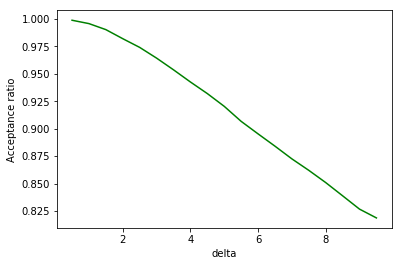

In [2]:
######

#modify the code for the metropolis algorithm in "Random Distribution.ipynb" to study equilibrium time
#for different step sizes delta
#run the code with an array of deltas
#How does equilibrium time change with delta? analyze accceptance ratio in terms of delta 


%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 100000

x = np.zeros(N)
deltaarray = np.arange(0.5,10,0.5) #an array of deltas
sigma = 10.
sigma2 = sigma**2

Naccept=np.zeros(len(deltaarray))
ratio=np.zeros(len(deltaarray))

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew
# Only here to get a better starting point

for j  in range (0,len(deltaarray)):
    delta=deltaarray[j]
    xwalker = 20.
    Nwarmup = 500000
    for k in range(Nwarmup):
        xwalker = metropolis(xwalker)
        ###
    x[0] = xwalker

    for i in range(1,N):
        x0 = x[i-1]
        for i in range(10):
            x0 = metropolis(x0)
        x[i] = metropolis(x0)
        if (x[i]!=x0): # acceptance 
            Naccept[j]+=1
    ratio[j]=Naccept[j]/N        
            
            
        
pyplot.plot(deltaarray,ratio,'g')
pyplot.xlabel('delta')
pyplot.ylabel('Acceptance ratio')